# 👟 Adidas Shoe Data Analysis




In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('husl')

<ipython-input-1-705760be23b9>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Data Loading and Initial Exploration

In [2]:
# Load the datasets
shoes_dim = pd.read_csv('/kaggle/input/adidas-webstore-shoe-data/shoes_dim.csv')
shoes_fact = pd.read_csv('/kaggle/input/adidas-webstore-shoe-data/shoes_fact.csv')
country_dim = pd.read_csv('/kaggle/input/adidas-webstore-shoe-data/country_dim.csv')

# Display basic information about the datasets
print("\nShoes Dimension Table Info:")
shoes_dim.info()

print("\nShoes Fact Table Info:")
shoes_fact.info()

print("\nCountry Dimension Table Info:")
country_dim.info()


Shoes Dimension Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3302 non-null   object
 1   name            3302 non-null   object
 2   best_for_wear   3302 non-null   object
 3   gender          3302 non-null   object
 4   image_url       3302 non-null   object
 5   dominant_color  3302 non-null   object
 6   sub_color1      3300 non-null   object
 7   sub_color2      3298 non-null   object
dtypes: object(8)
memory usage: 206.5+ KB

Shoes Fact Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    299156 non-null  int64  
 1   id            299156 non-null  object 
 2   price         299156 non-null  float64
 3   category      299156 non

## 2. Data Quality Analysis

In [3]:
def analyze_data_quality(df, title):
    print(f"\n{title} Data Quality Analysis")
    print("-" * 50)
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    quality_df = pd.DataFrame({
        'Missing Values': missing,
        'Missing Percentage': missing_pct.round(2)
    })
    
    print("\nMissing Values Analysis:")
    display(quality_df[quality_df['Missing Values'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate Records: {duplicates}")

# Analyze each dataset
analyze_data_quality(shoes_dim, "Shoes Dimension")
analyze_data_quality(shoes_fact, "Shoes Fact")
analyze_data_quality(country_dim, "Country Dimension")


Shoes Dimension Data Quality Analysis
--------------------------------------------------

Missing Values Analysis:


,Missing Values,Missing Percentage
sub_color1,2,0.06
sub_color2,4,0.12



Duplicate Records: 0

Shoes Fact Data Quality Analysis
--------------------------------------------------

Missing Values Analysis:


,Missing Values,Missing Percentage



Duplicate Records: 0

Country Dimension Data Quality Analysis
--------------------------------------------------

Missing Values Analysis:


,Missing Values,Missing Percentage



Duplicate Records: 0


## 3. Product Analysis

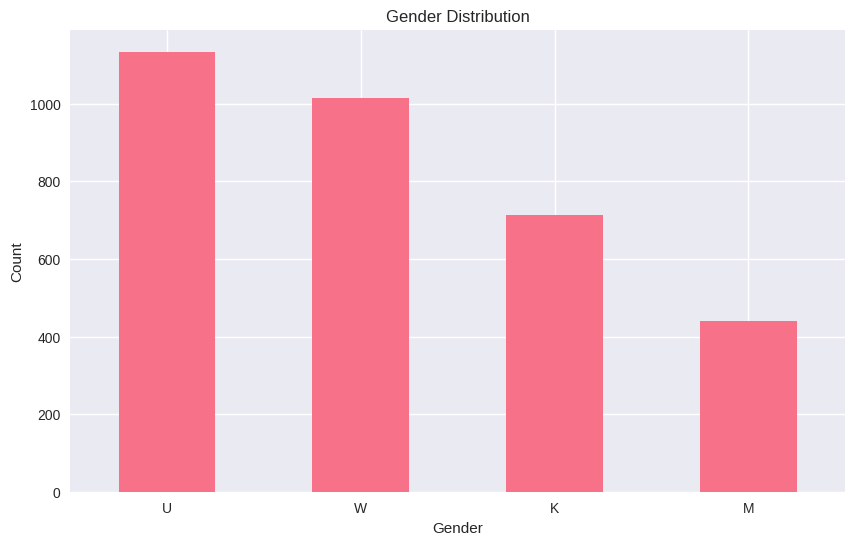

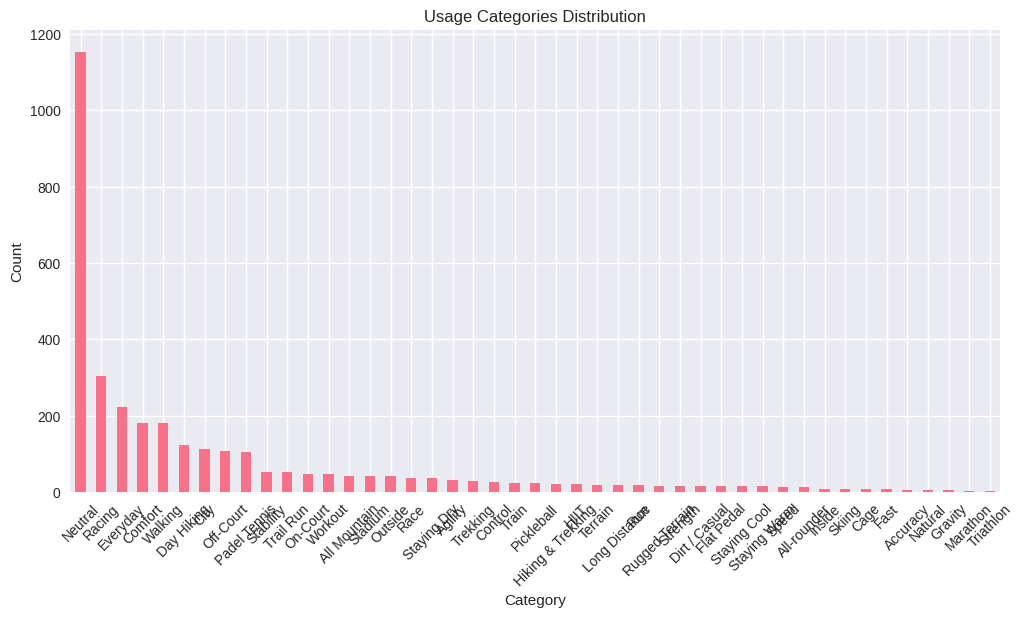

In [4]:
# Gender Distribution
plt.figure(figsize=(10, 6))
shoes_dim['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Usage Categories
plt.figure(figsize=(12, 6))
shoes_dim['best_for_wear'].value_counts().plot(kind='bar')
plt.title('Usage Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4. Color Analysis

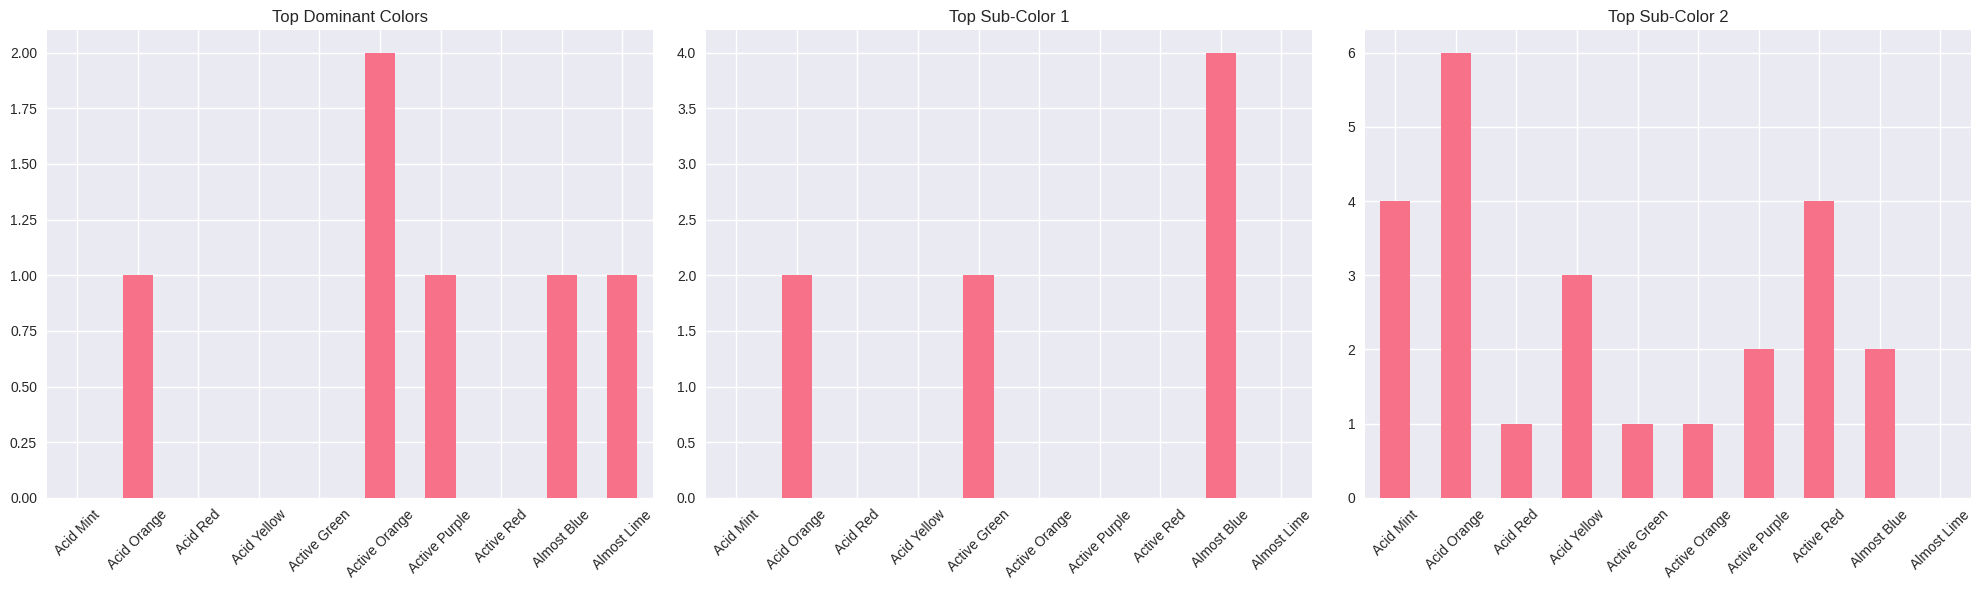

In [5]:
# Analyze color patterns
def analyze_colors(df):
    colors_df = pd.DataFrame({
        'Dominant': df['dominant_color'].value_counts(),
        'Sub1': df['sub_color1'].value_counts(),
        'Sub2': df['sub_color2'].value_counts()
    })
    
    # Plot top 10 colors for each category
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    colors_df['Dominant'].head(10).plot(kind='bar', ax=axes[0], title='Top Dominant Colors')
    colors_df['Sub1'].head(10).plot(kind='bar', ax=axes[1], title='Top Sub-Color 1')
    colors_df['Sub2'].head(10).plot(kind='bar', ax=axes[2], title='Top Sub-Color 2')
    
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

analyze_colors(shoes_dim)

## 5. Geographic Analysis

In [6]:
# Analyze geographic distribution
print("Currency Distribution:")
display(country_dim['currency'].value_counts())

print("\nShoe Metric Distribution:")
display(country_dim['shoe_metric'].value_counts())

# Create a summary table
geo_summary = pd.DataFrame({
    'Currency Count': country_dim['currency'].value_counts(),
    'Metric System': country_dim['shoe_metric'].value_counts()
})

display(geo_summary)

Currency Distribution:


currency
euro      2
usd       1
pounds    1
Name: count, dtype: int64


Shoe Metric Distribution:


shoe_metric
eu     2
usa    1
uk     1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Currency Count,Metric System
eu,NaN,2.0
euro,2.0,NaN
pounds,1.0,NaN
uk,NaN,1.0
usa,NaN,1.0
usd,1.0,NaN


## 6. Cross Analysis

<ipython-input-7-ed060d19f1bd>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

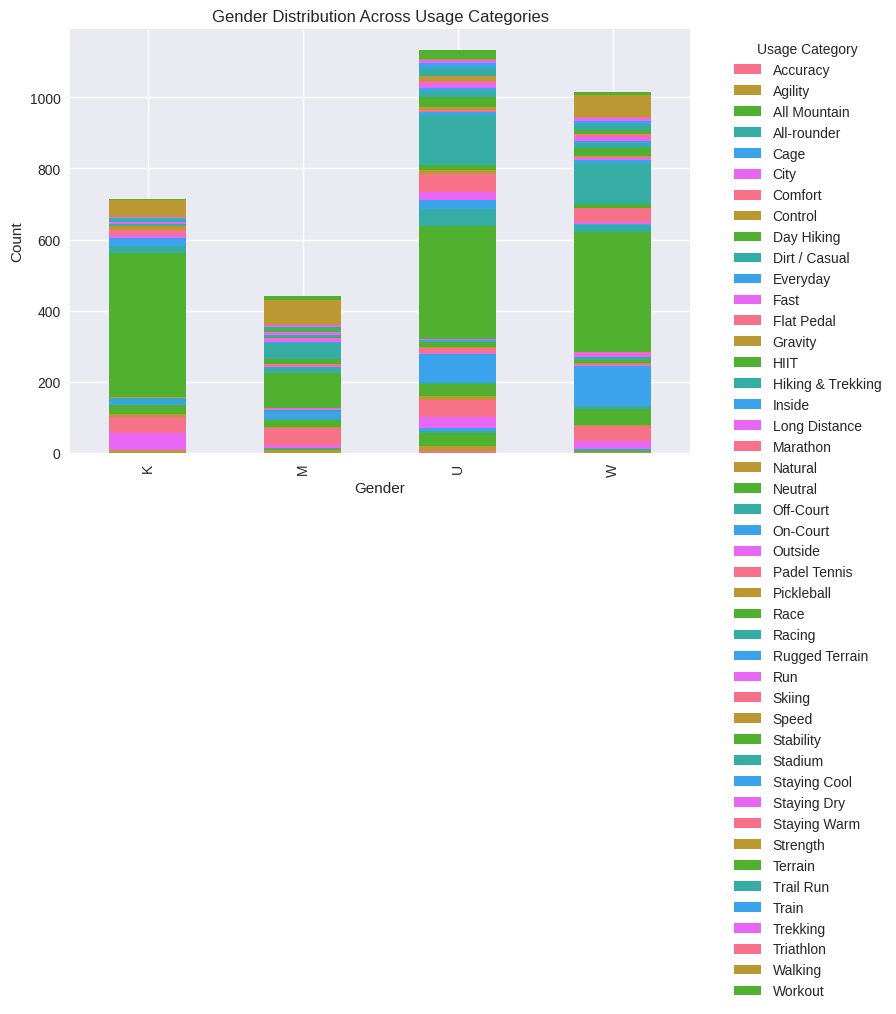

<Figure size 1200x600 with 0 Axes>

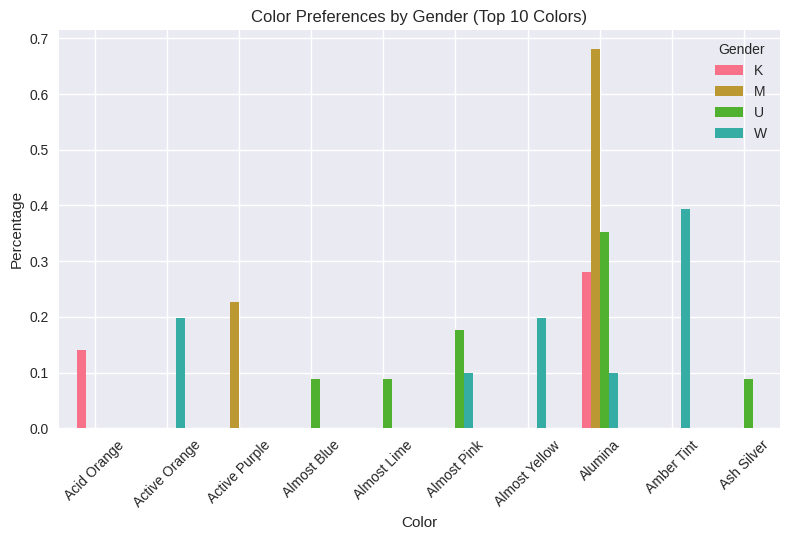

In [7]:
# Gender vs Usage Category
gender_usage = pd.crosstab(shoes_dim['gender'], shoes_dim['best_for_wear'])

plt.figure(figsize=(12, 6))
gender_usage.plot(kind='bar', stacked=True)
plt.title('Gender Distribution Across Usage Categories')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Usage Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Color preferences by gender
color_gender = pd.crosstab(shoes_dim['dominant_color'], shoes_dim['gender'])
color_gender_pct = color_gender.div(color_gender.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 6))
color_gender_pct.head(10).plot(kind='bar')
plt.title('Color Preferences by Gender (Top 10 Colors)')
plt.xlabel('Color')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Key Insights

In [8]:
# Generate key insights
print("Key Insights:")
print("-" * 50)

# Total products
print(f"Total unique shoes: {len(shoes_dim)}")

# Gender distribution
gender_dist = shoes_dim['gender'].value_counts()
print("\nGender Distribution:")
for gender, count in gender_dist.items():
    print(f"{gender}: {count} ({(count/len(shoes_dim)*100):.1f}%)")

# Most common categories
print("\nTop 5 Usage Categories:")
display(shoes_dim['best_for_wear'].value_counts().head())

# Most common colors
print("\nTop 5 Dominant Colors:")
display(shoes_dim['dominant_color'].value_counts().head())

Key Insights:
--------------------------------------------------
Total unique shoes: 3302

Gender Distribution:
U: 1134 (34.3%)
W: 1014 (30.7%)
K: 713 (21.6%)
M: 441 (13.4%)

Top 5 Usage Categories:


best_for_wear
Neutral     1153
Racing       304
Everyday     222
Comfort      182
Walking      180
Name: count, dtype: int64


Top 5 Dominant Colors:


dominant_color
Core Black      985
Cloud White     720
Olive Strata     66
Off White        56
Lucid Red        46
Name: count, dtype: int64